In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

## bh testing summary ##
# n_rej = 15726
# t_rej = 0.015726


FDP: 0.0709016914664 

## sbh summary ##
# n_rej = 19020
# t_rej = 0.027313
# pi_0 estimate = 0.696


FDP: 0.098738170347



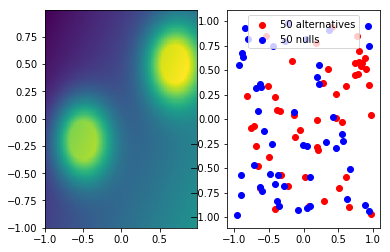

In [2]:
## generating a 1d toy data 
# p,x,h=toy_data_1d(n_sample=100000,vis=1)
# p,h,x=neuralfdr_generate_data_2D(job=0,data_vis=1) ## gaussian mixture
# p,h,x=neuralfdr_generate_data_2D(job=1,data_vis=1) ## linear trend 
p,h,x=neuralfdr_generate_data_2D(job=2,data_vis=1) ## gaussian mixture + linear trend

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)
print('FDP: %s\n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## PrimFDR_init starts
# Learning null distribution
# Learning alternative distribution
# Test result with PrimFDR_init
# Num of discovery: 15471




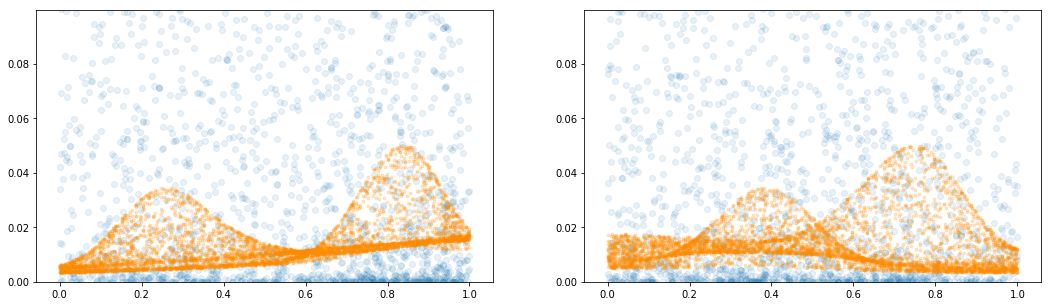

## PrimFDR_init finishes

## optimization paramter:
# n_itr=20000, n_samp=100000, lambda0=435, lambda1=100

## optimization initialization:
# Slope: a=[ 1.23058105 -0.42949706], b=[-5.23237896]
# Bump 0: w=-4.89832, mu=[ 0.39401612  0.40041393], sigma=[ 0.03285056  0.02211221]
# Bump 1: w=-4.24795, mu=[ 0.8820768   0.63334954], sigma=[ 0.00764365  0.02717837]
# Bump 2: w=-3.684, mu=[ 0.2407317   0.38354406], sigma=[ 0.02052388  0.02791882]
# Bump 3: w=-3.38109, mu=[ 0.81412089  0.76845944], sigma=[ 0.01823108  0.02072614]
# Bump 4: w=-6.49355, mu=[ 0.65750152  0.15476169], sigma=[ 0.03655032  0.00966957]


## iteration 0
n_rej:  15573
n_rej sig:  15377.0
FD esti mirror: 809
FD esti mirror sig: 824.314
loss1:  [-0.15377022]
loss2:  [ 0.]
Estimated FDP: [ 0.05360687]
FDP: 0.0
Slope: a=[ 1.23558092 -0.42449716], b=[-5.22737885]
Bump 0: w=-4.89332, mu=[ 0.39901197  0.39541554], sigma=[ 0.03285056  0.02211221]
Bump 1: w=-4.24295, mu=[ 0.87707746  0.62835091], sigma=[ 0.00764365  0.02717837]

/home/martin/NeuralFDR2/util.py:164: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


## iteration 4000
n_rej:  21835
n_rej sig:  21768.1
FD esti mirror: 2162
FD esti mirror sig: 2162.39
loss1:  [-0.21768144]
loss2:  [ 0.]
Estimated FDP: [ 0.09933757]
FDP: 0.0
Slope: a=[ 1.81253982 -0.33649984], b=[-4.88705444]
Bump 0: w=-3.69341, mu=[ 0.29212028  0.37540102], sigma=[ 0.03285056  0.02211221]
Bump 1: w=-2.13756, mu=[ 0.97150993  0.73863035], sigma=[ 0.00764365  0.02717837]
Bump 2: w=-2.33961, mu=[ 0.2684195   0.38633057], sigma=[ 0.02052388  0.02791882]
Bump 3: w=-1.93529, mu=[ 0.82201141  0.77333689], sigma=[ 0.01823108  0.02072614]
Bump 4: w=-4.52568, mu=[ 0.19149661  0.04397114], sigma=[ 0.03655032  0.00966957]


## iteration 8000
n_rej:  21730
n_rej sig:  21674.0
FD esti mirror: 2124
FD esti mirror sig: 2132.62
loss1:  [-0.21674034]
loss2:  [ 0.]
Estimated FDP: [ 0.09839497]
FDP: 0.0
Slope: a=[ 1.93321478 -0.57722878], b=[-4.88696718]
Bump 0: w=-3.68292, mu=[ 0.31424072  0.37735593], sigma=[ 0.03285056  0.02211221]
Bump 1: w=-2.00532, mu=[ 0.96675569  0.76903129], si

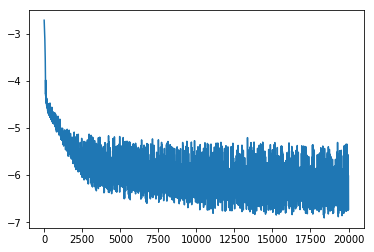

# Num of discovery: 13734




In [3]:
n_rej,t=PrimFDR(p,x,5,alpha=0.1,h=None,n_itr=20000,verbose=True)

### Testing ###

In [3]:
## testing the initialization 
w,a,mu,sigma = ML_init(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)

# plt.figure()
# temp=np.linspace(0,1,101)
# plt.hist(x[h==1],bins=50,weights=1/np.sum(h==1)*50*np.ones([np.sum(h==1)]))
# temp = np.linspace(0,1,101)
# plt.plot(temp,f_all(temp,a,mu,sigma,w))
# plt.show()

### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.686407465542, a=[ 0.9376416  -0.42949707]
Bump 0: w=0.136498323903, mu=[ 0.81574845  0.73854095], sigma=[ 0.09285315  0.11146091]
Bump 1: w=0.153519947202, mu=[ 0.25730885  0.38865851], sigma=[ 0.10473719  0.11977248]
Bump 2: w=0.0235742633522, mu=[ 0.54089265  0.35566079], sigma=[ 0.13526127  0.12702442]


## Testing Summary ##
Num of alternatives: 31232.0
Num of discovery: 20855
Num of true discovery: 18836.0
Actual FDP: 0.0968113162311




### Parameters
n_itr=100, n_samp=100000, lambda0=63.5896341778, lambda1=100.0
### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.686407465542, a=[ 0.9376416  -0.42949707]
Bump 0: w=0.136498323903, mu=[ 0.81574845  0.73854095], sigma=[ 0.09285315  0.11146091]
Bump 1: w=0.153519947202, mu=[ 0.25730885  0.38865851], sigma=[ 0.10473719  0.11977248]
Bump 2: w=0.0235742633522, mu=[ 0.54089265  0.35566079], sigma=[ 0.13526127  0.12702442]


## Summary before optimization ##
## Testing Summary ##
Num of alternatives: 31232.0
Num of discovery: 20844
Num of true discovery: 18823.0
Actual FDP: 0.0969583573211


### initialization value ###
Slope: a=[ 0.93764162 -0.42949706], b=[-4.92842531]
Bump 0: w=-3.51253, mu=[ 0.81574845  0.73854095], sigma=[ 0.01724342  0.02484707]
Bump 1: w=-3.58737, mu=[ 0.25730884  0.38865852], sigma=[ 0.02193976  0.0286909 ]
Bump 2: w=-5.77558, mu=[ 0.54089266  0.3556608 ], sigma=[ 0.03659122  0.03227041]


### iteration 0 ###
mean t:  0.0141296
mean

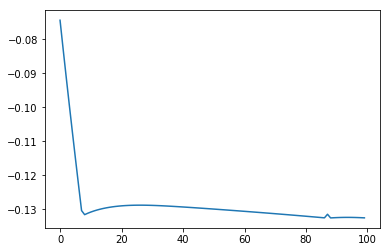

### Summary ###
method: perim_test_1d
# rejections: 21059
FDP: 0.0979153805974
### End Summary ###


In [4]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)
print("### Summary ###")
print("method: perim_test_1d")
print("# rejections: %s"%str(n_rej))
print("FDP: %s"%str( np.sum((h==0)*(p<t))/np.sum(p<t)))
print("### End Summary ###")